# Numbers

The `numpy` array is the foundation of essentially all numerical computing in Python, so it is important to understand the array and how to use it well.

## Learning objectives

1. Attributes of an array
2. How to create vectors, matrices, tensors (arrays with dimension > 2)
3. How to index and slice arrays
4. Generating random arrays and sampling
5. Universal functions, vectorization and matrix multiplication
6. Array axes and marginal calculations
7. Broadcasting (when trying to perform same operation on two arrays that are not same size)
8. Masking (tell numpy to ignore certain values)
9. Combining and splitting arrays
10. Vectorizing loops (using vector / matrix operations instead of loops)

Note: There are numpy alternatives, but they tend to use the same or similar syntax

In [1]:
import numpy as np

## The `ndarray`: Vectors, matrices and tenosrs

dtype, shape, strides

### Vector

In [5]:
# 1D array (which is like a vector)
x = np.array([1,2,3])
x

array([1, 2, 3])

In [11]:
# -1 means numpy should guess the correct number. In this case, we specify one column, and Python chooses 3 rows
# Creates a column vector
np.array([1, 2, 3]).reshape([-1,1])

array([[1],
       [2],
       [3]])

In [6]:
type(x)

numpy.ndarray

In [7]:
x.dtype

dtype('int64')

In [16]:
x.shape

(3,)

In [9]:
# number of bytes
x.strides

(8,)

### Matrix

In [17]:
x = np.array([[1,2,3], [4,5,6]], dtype=np.int32)
x

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [18]:
x.dtype

dtype('int32')

In [19]:
# 2 rows, 3 columns
x.shape

(2, 3)

In [20]:
x.strides

(12, 4)

### Tensor

In [2]:
x = np.arange(24).reshape((2,3,4))

In [24]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Creating `ndarray`s

### From a file

In [27]:
%%file numbers.txt
a,b,c # can also skip headers
1,2,3
4,5,6

Writing numbers.txt


In [28]:
np.loadtxt('numbers.txt', dtype='int', delimiter=',',
           skiprows=1, comments='#')

array([[1, 2, 3],
       [4, 5, 6]])

### From Python lists or tuples

In [29]:
np.array([
    [1,2,3],
    [4,5,6]
])

array([[1, 2, 3],
       [4, 5, 6]])

### From ranges

arange, linspace, logspace

In [30]:
# np.arange is same as range for numpy. Fills rows first by default
np.arange(1, 7).reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
np.linspace(1, 10, 4)

array([ 1.,  4.,  7., 10.])

In [32]:
np.logspace(0, 4, 5, dtype='int')

array([    1,    10,   100,  1000, 10000])

### From a function

`fromfunciton`

In [33]:
# Function says what value each cell should have based on position
np.fromfunction(lambda i, j: i*3 + j + 1, (2,3))

array([[1., 2., 3.],
       [4., 5., 6.]])

In [34]:
np.fromfunction(lambda i, j: (i-2)**2 + (j-2)**2, (5,5), dtype='int')

array([[8, 5, 4, 5, 8],
       [5, 2, 1, 2, 5],
       [4, 1, 0, 1, 4],
       [5, 2, 1, 2, 5],
       [8, 5, 4, 5, 8]])

#### How to visualize `fromfunction` 

In [35]:
j = np.repeat([np.arange(5)], 5, axis=0)
i = j.T

In [36]:
i

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [37]:
j

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [38]:
(i-2)**2 + (j-2)**2

array([[8, 5, 4, 5, 8],
       [5, 2, 1, 2, 5],
       [4, 1, 0, 1, 4],
       [5, 2, 1, 2, 5],
       [8, 5, 4, 5, 8]])

#### Using element-wise functions in `fromfunction`

In [39]:
np.fromfunction(lambda i, j: np.where(i==j,0, -1), (5,5))

array([[ 0, -1, -1, -1, -1],
       [-1,  0, -1, -1, -1],
       [-1, -1,  0, -1, -1],
       [-1, -1, -1,  0, -1],
       [-1, -1, -1, -1,  0]])

In [40]:
np.fromfunction(lambda i, j: np.where(i<j, 1, np.where(i==j,0, -1)), (5,5))

array([[ 0,  1,  1,  1,  1],
       [-1,  0,  1,  1,  1],
       [-1, -1,  0,  1,  1],
       [-1, -1, -1,  0,  1],
       [-1, -1, -1, -1,  0]])

In [41]:
np.fromfunction(lambda i, j: np.minimum(i,j), (5,5), dtype='int')

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 1, 2, 2, 2],
       [0, 1, 2, 3, 3],
       [0, 1, 2, 3, 4]])

In [42]:
np.fromfunction(lambda i, j: np.maximum(i,j), (5,5), dtype='int')

array([[0, 1, 2, 3, 4],
       [1, 1, 2, 3, 4],
       [2, 2, 2, 3, 4],
       [3, 3, 3, 3, 4],
       [4, 4, 4, 4, 4]])

### From special constructors

zeros, ones, eye, diag

In [43]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [44]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [45]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [46]:
# Doesn't have to be square
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [47]:
# Can offset 1's from diagonal
np.eye(4, k=-1)

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [48]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [49]:
np.diag([1,2,3,4], k=1)

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

### From random variables

#### Convenience functions

rand, randn

In [50]:
# Uniform
np.random.rand(2,3)

array([[0.62714498, 0.76026772, 0.77202773],
       [0.02715102, 0.84982795, 0.05837353]])

In [51]:
# Standard normal
np.random.randn(2,3)

array([[-0.97359113, -0.95378846, -1.16320165],
       [ 1.76855437, -0.2479148 ,  0.06691788]])

#### Distributions

uniform, normal, randint, poisson, multinomial, multivariate_ normal

In [52]:
np.random.uniform(0, 1, (2,3))

array([[0.08631122, 0.27358747, 0.53793108],
       [0.3190033 , 0.82258753, 0.2233583 ]])

In [53]:
np.random.normal(0, 1, (2,3))

array([[-1.45531815, -1.20090964, -2.20962917],
       [-1.64417944,  0.42055602, -0.40536003]])

In [54]:
np.random.randint(0, 10, (4,5))

array([[0, 7, 6, 9, 0],
       [4, 6, 3, 1, 9],
       [9, 9, 1, 8, 2],
       [3, 6, 9, 0, 7]])

In [55]:
np.random.poisson(10, (4,5))

array([[11, 16,  9, 12,  7],
       [ 9, 12,  6,  9, 15],
       [12, 14,  8,  8, 14],
       [25,  6,  9, 19, 17]])

In [56]:
np.random.multinomial(n=5, pvals=np.ones(5)/5, size=8)

array([[1, 3, 1, 0, 0],
       [1, 1, 2, 1, 0],
       [0, 1, 1, 3, 0],
       [1, 0, 1, 1, 2],
       [1, 1, 0, 2, 1],
       [1, 1, 0, 1, 2],
       [1, 3, 0, 0, 1],
       [1, 2, 1, 1, 0]])

In [57]:
np.random.multivariate_normal(mean=[10,20,30], cov=np.eye(3), size=4)

array([[10.28065478, 20.52686803, 29.66922868],
       [ 9.12998199, 19.84150138, 31.07355396],
       [ 9.35603618, 19.4041181 , 28.91581478],
       [10.32892276, 18.5119342 , 30.65627675]])

### Sampling using `choice`

Works much like the R `sample` function.

In [58]:
x = np.random.permutation(list('ABCDEF'))

In [60]:
# Breaks string into list with each letter being an element
list('ABCDEF')

['A', 'B', 'C', 'D', 'E', 'F']

In [59]:
x

array(['A', 'F', 'D', 'E', 'C', 'B'], dtype='<U1')

In [61]:
np.random.choice(x, 3)

array(['E', 'F', 'F'], dtype='<U1')

In [62]:
# Need to specify sampling without replacement if desired
np.random.choice(x, 10)

array(['C', 'E', 'C', 'C', 'D', 'F', 'C', 'F', 'C', 'F'], dtype='<U1')

In [63]:
try:
    np.random.choice(x, 10, replace=False)
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


## Indexing 

In [64]:
x = np.arange(20).reshape((4,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Extracing a scalar

In [65]:
x[1,1]

6

### Extracting a vector

In [66]:
# Single number returns a row vector
x[1]

array([5, 6, 7, 8, 9])

### Using slices

In [67]:
x[1,:]

array([5, 6, 7, 8, 9])

In [68]:
# All rows, column 1
x[:,1]

array([ 1,  6, 11, 16])

In [69]:
# Recall, end of range is exclusive
x[1:3,1:3]

array([[ 6,  7],
       [11, 12]])

### Using slices with strides

In [70]:
x[::2,::2]

array([[ 0,  2,  4],
       [10, 12, 14]])

### Extrcting blocks with arbitrary row and column lists (fancy indexing)

`np.ix_`

In [71]:
# Only words when one of the dimensions returns all (i.e., a colon)
x[:, [0,3]]

array([[ 0,  3],
       [ 5,  8],
       [10, 13],
       [15, 18]])

Warning: Fancy indexing can only be used for 1 dimension at a time.

In the example below, `numpy` treats the arguments as *paired* coordinates, and returns the values at (0,0) and (2,3).

In [72]:
x[[0,2],[0,3]]

array([ 0, 13])

Use the helper `np.ix_` to extract arbitrary blocks.

In [73]:
x[np.ix_([0,2], [0,3])]

array([[ 0,  3],
       [10, 13]])

### A slice is a view, not a copy

**Warning**

```python
b = a[:]
```

makes a copy if `a` is a list but not if `a` is a numpy array

In [74]:
a1 = list(range(3))
a2 = np.arange(3)

In [75]:
b = a1[:]
b[1] = 9
a1

[0, 1, 2]

In [77]:
# Original array gets altered!
b = a2[:]
b[1] = 9
a2

array([0, 9, 2])

In [78]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [79]:
y = x[1:-1, 1:-1]
y

array([[ 6,  7,  8],
       [11, 12, 13]])

In [80]:
y *= 10

In [81]:
y

array([[ 60,  70,  80],
       [110, 120, 130]])

In [82]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

**Use the copy method to convert a view to a copy**

In [83]:
z = x[1:-1, 1:-1].copy()

In [84]:
z

array([[ 60,  70,  80],
       [110, 120, 130]])

In [85]:
z[:] = 0

In [86]:
z

array([[0, 0, 0],
       [0, 0, 0]])

In [87]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

### Boolean indexing

In [88]:
# Always returns 1D array
x[x % 2 == 0]

array([  0,   2,   4,  60,  70,  80,  10, 110, 120, 130,  14,  16,  18])

In [89]:
x [x > 3]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

### Functions that return indexes

In [91]:
# Gives indices for non-zero entries
idx = np.nonzero(x)
idx

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [92]:
x[idx]

array([  1,   2,   3,   4,   5,  60,  70,  80,   9,  10, 110, 120, 130,
        14,  15,  16,  17,  18,  19])

In [93]:
idx = np.where(x > 3)
idx

(array([0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [94]:
x[idx]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

## Universal functions

In [95]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

Operations

In [96]:
x + x

array([[  0,   2,   4,   6,   8],
       [ 10, 120, 140, 160,  18],
       [ 20, 220, 240, 260,  28],
       [ 30,  32,  34,  36,  38]])

Element-wise functions

In [97]:
np.log1p(x) # log(x) + 1

array([[0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 4.11087386, 4.26267988, 4.39444915, 2.30258509],
       [2.39789527, 4.7095302 , 4.79579055, 4.87519732, 2.7080502 ],
       [2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227]])

In [98]:
# Gives lower and upper bound
x.clip(10, 100)

array([[ 10,  10,  10,  10,  10],
       [ 10,  60,  70,  80,  10],
       [ 10, 100, 100, 100,  14],
       [ 15,  16,  17,  18,  19]])

Scans

In [99]:
np.cumsum(x, axis=1)

array([[  0,   1,   3,   6,  10],
       [  5,  65, 135, 215, 224],
       [ 10, 120, 240, 370, 384],
       [ 15,  31,  48,  66,  85]])

Reductions

In [100]:
np.sum(x)

703

In [101]:
x.prod()

0

## Margins and the `axis` argument

In [102]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

The 0th axis has 4 items, the 1st axis has 5 items.

In [103]:
x.shape

(4, 5)

In [104]:
x.mean()

35.15

### Marginalizing out the 0th axis = column summaries

In [105]:
# Marginalizes 0th axis, which refers to rows... means rows will "disappear"
x.mean(axis=0)

array([ 7.5 , 46.75, 52.25, 57.75, 11.5 ])

### Marginalizing out the 1st axis = row summaries

In [106]:
x.mean(axis=1)

array([ 2. , 44.8, 76.8, 17. ])

Note marginalizing out the last axis is a common default.

In [107]:
x.mean(axis=-1)

array([ 2. , 44.8, 76.8, 17. ])

### Marginalization works for higher dimensions in the same way

In [108]:
x = np.random.random((2,3,4))
x

array([[[0.50405392, 0.57784173, 0.41159044, 0.72692582],
        [0.47458899, 0.02542905, 0.80778833, 0.87714966],
        [0.58456692, 0.35611667, 0.70781391, 0.44196183]],

       [[0.08716115, 0.32468677, 0.82071695, 0.52673336],
        [0.29664671, 0.3067223 , 0.6104232 , 0.61916896],
        [0.20120738, 0.40392386, 0.57092189, 0.29781173]]])

In [109]:
x.shape

(2, 3, 4)

In [110]:
x.mean(axis=0).shape

(3, 4)

In [111]:
x.mean(axis=1).shape

(2, 4)

In [112]:
x.mean(axis=2).shape

(2, 3)

In [113]:
# Can marginalize out multiple axes
x.mean(axis=(0,1)).shape

(4,)

In [114]:
x.mean(axis=(0,2)).shape

(3,)

In [115]:
x.mean(axis=(1,2)).shape

(2,)

## Broadcasting

Broadcasting is what happens when `numpy` tries to perform binary operations on two arrays with different shapes. In general, shapes are *promoted* to make the arrays compatible using the following rule

- For each axis from highest to lowest
    - If both dimensions are the same, do nothing
    - If one of the dimensions is 1 or None and the other is $k$, promote to $k$
    - Otherwise print error message

In [116]:
x = np.zeros((3,2))
x.shape

(3, 2)

In [117]:
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Shapes are compatible

In [126]:
# When comparing dimensions, start at right-most dimension and work to the left (checking rules above)
y = np.ones(2)
y.shape

(2,)

In [119]:
x + y

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are compatible

In [120]:
y = np.ones((1,2))
y.shape

(1, 2)

In [121]:
x + y

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are incompatible but can be made compaible by adding empty dimension

In [130]:
y = np.ones(3)
y.shape

(3,)

In [131]:
try:
    x + y
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (3,) 


In [132]:
# Inserts a dummy dimension
y[:, None].shape

(3, 1)

In [125]:
x + y[:, None]

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are incompatible

In [127]:
y = np.ones((2,2))
y.shape

(2, 2)

In [128]:
try:
    x + y
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (2,2) 


### More examples of broadcasting

In [133]:
x1 = np.arange(12)

In [134]:
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [135]:
x1 * 10

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [136]:
x2 = np.random.randint(0,10,(3,4))

In [137]:
x2

array([[0, 4, 1, 1],
       [3, 7, 0, 5],
       [5, 2, 0, 0]])

In [138]:
x2 * 10

array([[ 0, 40, 10, 10],
       [30, 70,  0, 50],
       [50, 20,  0,  0]])

In [139]:
x2.shape

(3, 4)

### Column-wise broadcasting

In [140]:
mu = np.mean(x2, axis=0)
mu.shape

(4,)

In [141]:
x2 - mu

array([[-2.66666667, -0.33333333,  0.66666667, -1.        ],
       [ 0.33333333,  2.66666667, -0.33333333,  3.        ],
       [ 2.33333333, -2.33333333, -0.33333333, -2.        ]])

In [142]:
(x2 - mu).mean(axis=0)

array([1.48029737e-16, 2.96059473e-16, 3.70074342e-17, 0.00000000e+00])

### Row wise broadcasting

In [143]:
mu = np.mean(x2, axis=1)
mu.shape

(3,)

In [144]:
try:
    x2 - mu
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,4) (3,) 


### We can add a "dummy" axis using None or `np.newaxis`

In [145]:
mu[:, None].shape

(3, 1)

In [146]:
x2 - mu[:, None]

array([[-1.5 ,  2.5 , -0.5 , -0.5 ],
       [-0.75,  3.25, -3.75,  1.25],
       [ 3.25,  0.25, -1.75, -1.75]])

In [147]:
# Does same thing as the "None" syntax above
x2 - mu[:, np.newaxis]

array([[-1.5 ,  2.5 , -0.5 , -0.5 ],
       [-0.75,  3.25, -3.75,  1.25],
       [ 3.25,  0.25, -1.75, -1.75]])

In [148]:
np.mean(x2 - mu[:, None], axis=1)

array([0., 0., 0.])

#### Reshaping works too

In [149]:
x2 - mu.reshape((-1,1))

array([[-1.5 ,  2.5 , -0.5 , -0.5 ],
       [-0.75,  3.25, -3.75,  1.25],
       [ 3.25,  0.25, -1.75, -1.75]])

#### Exercise in broadcasting

Creating a 12 by 12 multiplication table

In [150]:
x = np.arange(1, 13)
x[:,None] * x[None,:]

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

Scaling to have zero mean and unit standard devation for each feature.

In [151]:
x = np.random.normal(10, 5,(3,4))
x

array([[14.17567293,  6.50796953, 11.12009193,  2.62072251],
       [ 8.59736853,  5.25756209, 15.14943199, 11.67007694],
       [ 0.65966542,  9.4391506 ,  7.21314915, 10.57761823]])

Scaling column-wise

In [152]:
(x - x.mean(axis=0))/x.std(axis=0)

array([[ 1.14766576, -0.31969229, -0.01259191, -1.40554016],
       [ 0.14181192, -1.03319519,  1.23099228,  0.8382051 ],
       [-1.28947768,  1.35288748, -1.21840037,  0.56733506]])

Scaling row-wise

In [153]:
(x - x.mean(axis=1)[:, None])/x.std(axis=1)[:, None]

array([[ 1.26477055, -0.47645994,  0.57088993, -1.35920053],
       [-0.42902964, -1.34096844,  1.36002041,  0.40997767],
       [-1.64381989,  0.64233703,  0.06269158,  0.93879128]])

## Masking

- [Ref](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)

In [154]:
import numpy.ma as ma

In [155]:
x = np.arange(20).reshape(4,5)

In [156]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [157]:
mask = x % 2 == 0
mask

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

- Note that values that are True in the mask are not used in the array
- Values that are False are *not* masked and so remain
- So the above mask keeps only the *odd* numbers in the array `x`

In [158]:
m = ma.masked_array(x, mask)

In [159]:
m

masked_array(
  data=[[--, 1, --, 3, --],
        [5, --, 7, --, 9],
        [--, 11, --, 13, --],
        [15, --, 17, --, 19]],
  mask=[[ True, False,  True, False,  True],
        [False,  True, False,  True, False],
        [ True, False,  True, False,  True],
        [False,  True, False,  True, False]],
  fill_value=999999)

In [160]:
m.data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [161]:
m.mask

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [162]:
# Only operates on the un-masked values
m.sum(axis=0).data

array([20, 12, 24, 16, 28])

In [163]:
m.sum(axis=1).data

array([ 4, 21, 24, 51])

### Often used with missing value sentinels

In [164]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', RuntimeWarning)
    x1 = x / mask

In [165]:
x1

array([[ 0., inf,  2., inf,  4.],
       [inf,  6., inf,  8., inf],
       [10., inf, 12., inf, 14.],
       [inf, 16., inf, 18., inf]])

In [166]:
x1.sum()

inf

In [167]:
x2 = ma.masked_invalid(x1)
x2

masked_array(
  data=[[0.0, --, 2.0, --, 4.0],
        [--, 6.0, --, 8.0, --],
        [10.0, --, 12.0, --, 14.0],
        [--, 16.0, --, 18.0, --]],
  mask=[[False,  True, False,  True, False],
        [ True, False,  True, False,  True],
        [False,  True, False,  True, False],
        [ True, False,  True, False,  True]],
  fill_value=1e+20)

In [168]:
x2.data

array([[ 0., inf,  2., inf,  4.],
       [inf,  6., inf,  8., inf],
       [10., inf, 12., inf, 14.],
       [inf, 16., inf, 18., inf]])

In [169]:
x2.mask

array([[False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

In [170]:
x2.sum()

90.0

In [171]:
x2.filled(0)

array([[ 0.,  0.,  2.,  0.,  4.],
       [ 0.,  6.,  0.,  8.,  0.],
       [10.,  0., 12.,  0., 14.],
       [ 0., 16.,  0., 18.,  0.]])

## Combining `ndarray`s

In [172]:
x1 = np.zeros((3,4))
x2 = np.ones((3,5))
x3 = np.eye(4)

In [173]:
x1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [174]:
x2

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [175]:
x3

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding rows when number of columns is the same

In [176]:
np.r_[x1, x3]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding columns when number of rows is the same

In [177]:
np.c_[x1, x2]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

### You can combine more than 2 at a time

In [178]:
np.c_[x1, x2, x1]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

### Stacking

In [180]:
# Same as row-bind
np.vstack([x1, x3])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [182]:
# Same as column-bind
np.hstack([x1, x2])

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [183]:
np.dstack([x2, 2*x2, 3*x2])

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Generic stack with axis argument

In [185]:
# Same as row stack
np.stack([x2, 2*x2, 3*x2], axis=0)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]]])

In [186]:
np.stack([x2, 2*x2, 3*x2], axis=1)

array([[[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]]])

In [187]:
np.stack([x2, 2*x2, 3*x2], axis=2)

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Repetition and tiling

#### For a vector

In [2]:
x = np.array([1,2,3])

In [3]:
np.repeat(x, 3) # Element by element

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [4]:
np.tile(x, 3) # Whole array at a time

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

#### For a matrix

In [5]:
x = np.arange(6).reshape((2,3))
x

array([[0, 1, 2],
       [3, 4, 5]])

In [6]:
np.repeat(x, 3) # With no axis specification, creates 1D array

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

In [7]:
np.repeat(x, 3, axis=0)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5],
       [3, 4, 5]])

In [8]:
np.repeat(x, 3, axis=1)

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4, 5, 5, 5]])

In [9]:
np.tile(x, (3,2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

## Splitting `ndarray`s

In [10]:
x = np.arange(32).reshape((4,8))

In [11]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [12]:
np.split(x, 4)

[array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11, 12, 13, 14, 15]]),
 array([[16, 17, 18, 19, 20, 21, 22, 23]]),
 array([[24, 25, 26, 27, 28, 29, 30, 31]])]

In [13]:
np.split(x, 4, axis=1)

[array([[ 0,  1],
        [ 8,  9],
        [16, 17],
        [24, 25]]), array([[ 2,  3],
        [10, 11],
        [18, 19],
        [26, 27]]), array([[ 4,  5],
        [12, 13],
        [20, 21],
        [28, 29]]), array([[ 6,  7],
        [14, 15],
        [22, 23],
        [30, 31]])]

## Saving and loading arrays

In [14]:
x = np.arange(16).reshape(4,4)
y = np.arange(20).reshape(-1,4)

In [15]:
np.save('x.npy', x)

In [16]:
np.load('x.npy')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [17]:
np.savez('xy.npz', x=x, y=y) # Save multiple numpy arrays into a single file (with .npz file name ending)

In [18]:
arr = np.load('xy.npz') # Single structure, which behaves as a dictionary

In [19]:
arr['x']

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [20]:
arr['y']

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [21]:
import os

In [22]:
os.remove('x.npy')

In [23]:
os.remove('xy.npz')

### Einstein summation notation

Useful for higher order tensors. Check out blog post on Einstein summation notation in most up-to-date version of notebook

In [24]:
x = np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
np.einsum('ii->', x) # Trace

15

In [34]:
np.einsum('ji->ij', x) # input -> output

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [32]:
np.einsum('ii->i', x) # Returns diagonal

array([1, 5, 9])

In [33]:
np.einsum('ij->i', x) # Returns row sums

array([ 6, 15, 24])

In [35]:
np.einsum('ij->j', x) # Returns column sums

array([12, 15, 18])

In [36]:
np.einsum('mn, np -> mp', x, x) # Standard matrix multiplication

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [ ]:
np.einsum('...i,...i', x, x)

In [ ]:
np.einsum('j...,j...', x,x)

## Vectorization

When at all possible, try to avoid using loops

### Example 1

The operators and functions (ufuncs) in Python are vectorized, and will work element-wise over all entries in an `ndarray`.

In [37]:
xs = np.zeros(10, dtype='int')
for i in range(10):
    xs[i] = i**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [38]:
xs = np.arange(10)**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Using ufuncs

In [39]:
np.sqrt(xs)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [40]:
np.log1p(xs)

array([0.        , 0.69314718, 1.60943791, 2.30258509, 2.83321334,
       3.25809654, 3.61091791, 3.91202301, 4.17438727, 4.40671925])

### Example 2

Scalar product.

In [44]:
n = 10

xs = np.random.rand(n)
ys = np.random.rand(n)

s = 0
for i in range(n):
    s += xs[i] * ys[i]
s

2.2348383265132834

In [45]:
np.dot(xs, ys)

2.2348383265132834

In [46]:
xs @ ys # Matrix multiplication

2.2348383265132834

In [56]:
# Outer product
xs.reshape(10, 1) @ xs.reshape(1, 10)
np.outer(xs, ys)

array([[0.29821288, 0.15492211, 0.43784934, 0.28829146, 0.13613758,
        0.41864202, 0.23636405, 0.0583262 , 0.44300641, 0.21491643],
       [0.41046199, 0.21323571, 0.60265845, 0.39680609, 0.18738058,
        0.57622137, 0.32533289, 0.08028053, 0.60975667, 0.29581226],
       [0.28347518, 0.14726585, 0.41621081, 0.27404409, 0.12940966,
        0.39795271, 0.22468293, 0.05544371, 0.42111302, 0.20429525],
       [0.16905646, 0.08782513, 0.24821618, 0.16343203, 0.07717621,
        0.23732757, 0.13399445, 0.03306504, 0.25113972, 0.12183582],
       [0.21045376, 0.10933109, 0.30899752, 0.20345205, 0.09607454,
        0.29544259, 0.16680602, 0.04116176, 0.31263695, 0.15167008],
       [0.14763515, 0.07669672, 0.21676446, 0.14272339, 0.06739713,
        0.20725557, 0.11701588, 0.02887534, 0.21931756, 0.10639789],
       [0.47104689, 0.24470967, 0.69161188, 0.45537535, 0.21503828,
        0.66127265, 0.37335258, 0.09213007, 0.69975781, 0.33947466],
       [0.39955291, 0.20756843, 0.5866412

In [48]:
sum(xs * ys)

2.2348383265132834

In [49]:
xs.dot(ys)

2.2348383265132834

In [50]:
np.einsum('i,i->', xs, ys) # Have two vectors and ask for a scalar... only have one option (dot product)

2.2348383265132834

### Example 3

\begin{align}
y_0 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_1 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_2 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
\end{align}




In [57]:
m = 3
n = 2

alpha = np.random.rand(1)
betas = np.random.rand(n,1)
xs = np.random.rand(m,n)

In [58]:
alpha

array([0.75908805])

In [59]:
betas

array([[0.99604517],
       [0.2925755 ]])

In [60]:
xs

array([[0.01821893, 0.50077046],
       [0.88464832, 0.12055759],
       [0.56973445, 0.18519832]])

### Using loops

In [65]:
%%timeit

ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha
    for j in range(n):
        ys[i] += betas[j] * xs[i,j]
ys

30.8 µs ± 639 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Removing inner loop

In [66]:
%%timeit
ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha + xs[i,:].T @ betas
ys

9.85 µs ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Removing all loops

In [67]:
%%timeit
ys = alpha + xs @ betas
ys

2.65 µs ± 32 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Alternative approach

The calculaiton with explicit intercepts and coefficients is common in deep learning, where $\alpha$ is called the bias ($b$) and $\beta$ are called the weights ($w$), and each equation is $y[i] = b + w[i]*x[i]$.

It is common in statisiics to use an augmented matrix in which the first column is all ones, so that all that is needed is a single matrix multiplicaiotn.

In [68]:
X = np.c_[np.ones(m), xs]
X

array([[1.        , 0.01821893, 0.50077046],
       [1.        , 0.88464832, 0.12055759],
       [1.        , 0.56973445, 0.18519832]])

In [69]:
alpha

array([0.75908805])

In [70]:
betas

array([[0.99604517],
       [0.2925755 ]])

In [71]:
betas_ = np.concatenate([[alpha], betas])
betas_

array([[0.75908805],
       [0.99604517],
       [0.2925755 ]])

In [75]:
%%timeit
ys = X @ betas_
ys

1.4 µs ± 18.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [77]:
%%timeit
np.einsum('ij, jk->ik', X, betas_)

3.69 µs ± 23.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Simulating diffusion
See how we use views to avoid making (slow) copies of the matrix at each step

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

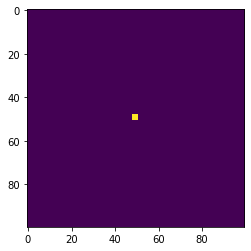

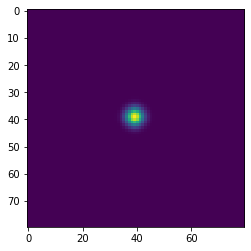

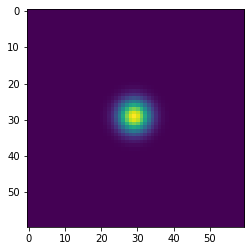

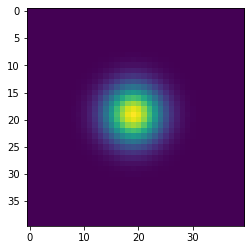

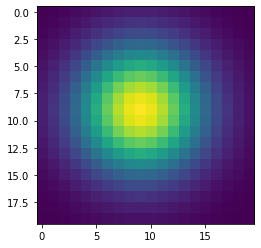

In [74]:
w = 100
h = 100
x = np.zeros((w+2,h+2), dtype='float') # Create matrix with border of one along each side
x[(w//2-1):(w//2+2), (h//2-1):(h//2+2)] = 1 # Exact center is one

wts = np.ones(5)/5

for i in range(41):
    if i % 10 == 0:    
        plt.figure()
        plt.imshow(x[1:-1, 1:-1], interpolation='nearest') # Plot everything except for boundaries
    
    # When we use the slice notation, we are using views, not making a copy!
    center = x[1:-1, 1:-1] # Everything except for border
    top = x[:-2, 1:-1] # Offset by one to the top
    bottom = x[2:, 1:-1] # Offset by one to the bottom
    left = x[1:-1, :-2] # Offset by to the left
    right = x[1:-1, 2:] # Offset by to the right
    nbrs = np.dstack([center, left, right, bottom, top]) 
    x = np.sum(wts * nbrs, axis=-1) # Sum across depth to return 102 x 102 matrix which is result of averaging with neighbors